# Libraries for data processing

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

## Importing raw data

In [2]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls') #reading the data
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
df_O = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls') # creating another dataframe to compare in future

In [4]:
df.info() #checking dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [5]:
df.describe() 

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


# Label encoding object type columns


In [6]:
object_cols = df.select_dtypes(include=['object']).columns
object_cols # selecting object type columns separately

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [7]:
LE=LabelEncoder() # label encoding object type to int
for i in df[['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition']]:
    df[i]=LE.fit_transform(df[i])

In [8]:
df.info() # checking dtype after encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpNumber                     1200 non-null   int32
 1   Age                           1200 non-null   int64
 2   Gender                        1200 non-null   int32
 3   EducationBackground           1200 non-null   int32
 4   MaritalStatus                 1200 non-null   int32
 5   EmpDepartment                 1200 non-null   int32
 6   EmpJobRole                    1200 non-null   int32
 7   BusinessTravelFrequency       1200 non-null   int32
 8   DistanceFromHome              1200 non-null   int64
 9   EmpEducationLevel             1200 non-null   int64
 10  EmpEnvironmentSatisfaction    1200 non-null   int64
 11  EmpHourlyRate                 1200 non-null   int64
 12  EmpJobInvolvement             1200 non-null   int64
 13  EmpJobLevel                   120

In [9]:
pd.set_option('display.max_columns', None) # setting to display max column

In [10]:
df.describe()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,36.918333,0.604167,2.23500,1.096667,3.215000,9.039167,1.595000,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,0.294167,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,0.148333,2.948333
std,346.554469,9.087289,0.489233,1.31004,0.731050,1.696911,4.754451,0.679234,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,0.455857,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.355578,0.518866
min,0.000000,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,299.750000,30.000000,0.000000,1.00000,1.000000,1.000000,4.000000,1.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,0.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,3.000000
50%,599.500000,36.000000,1.000000,2.00000,1.000000,4.000000,9.000000,2.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,0.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,3.000000
75%,899.250000,43.000000,1.000000,3.00000,2.000000,5.000000,13.000000,2.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,1.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000,3.000000
max,1199.000000,60.000000,1.000000,5.00000,2.000000,5.000000,18.000000,2.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,1.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,4.000000


# Outliers checking

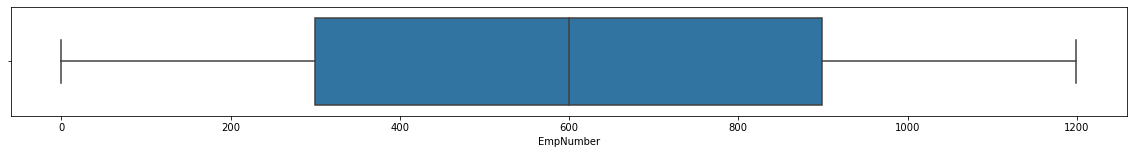

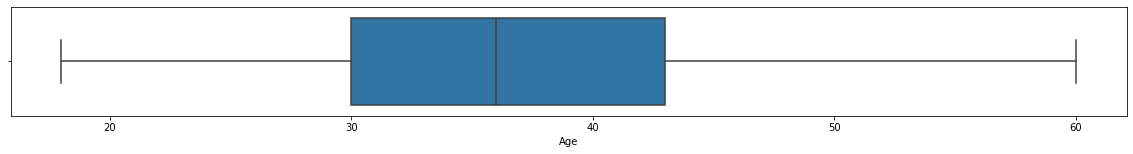

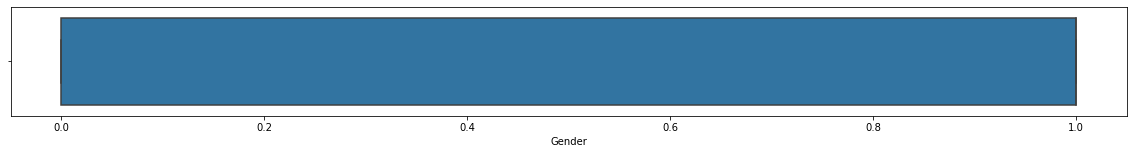

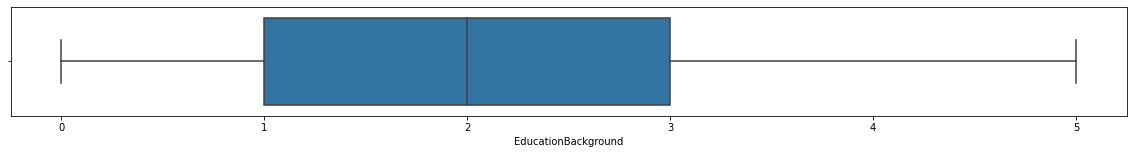

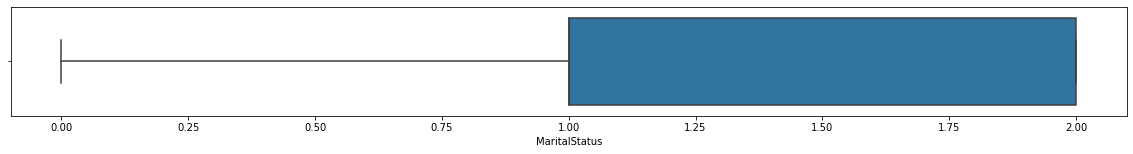

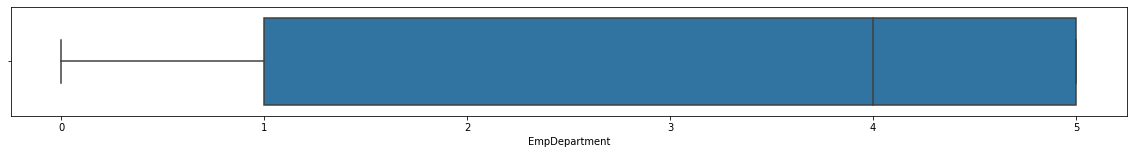

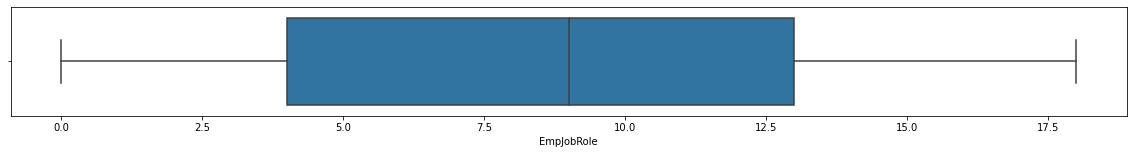

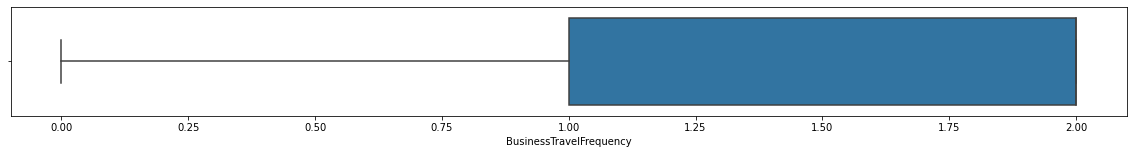

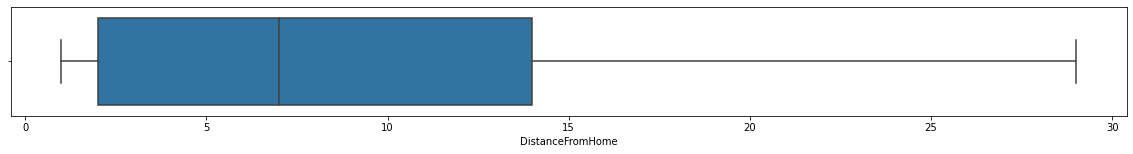

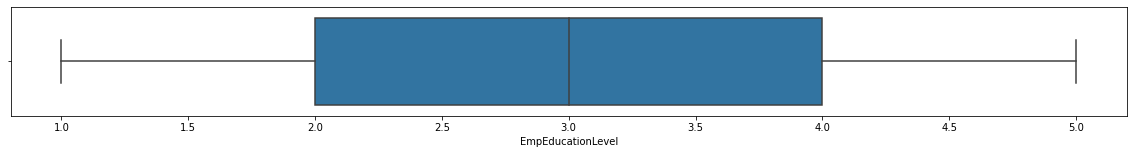

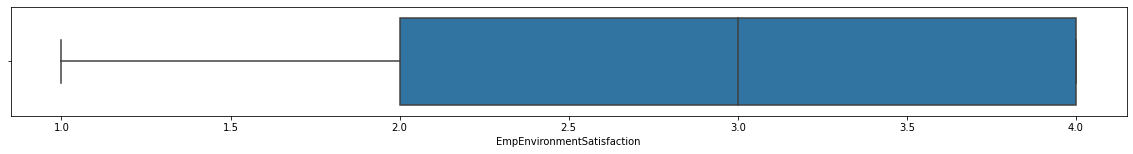

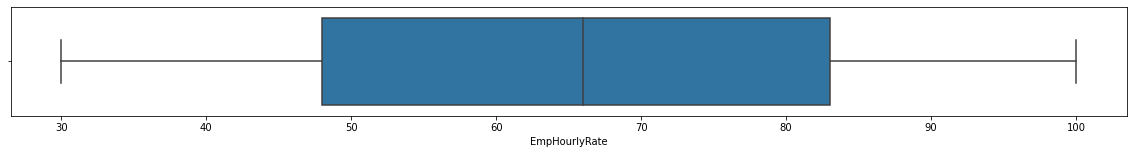

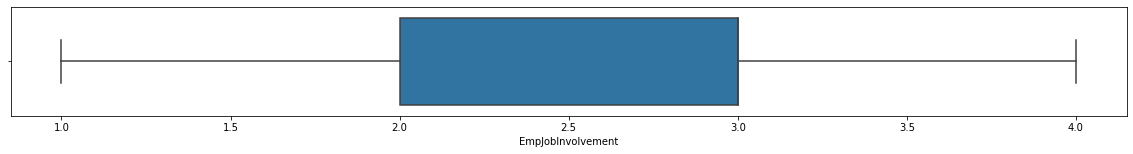

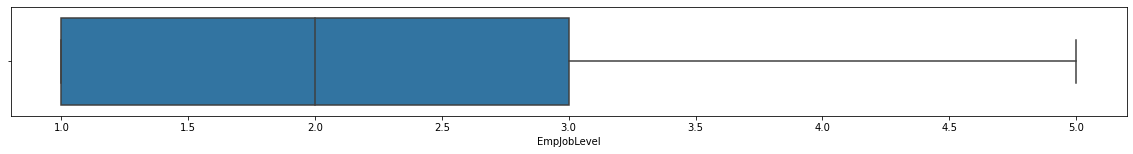

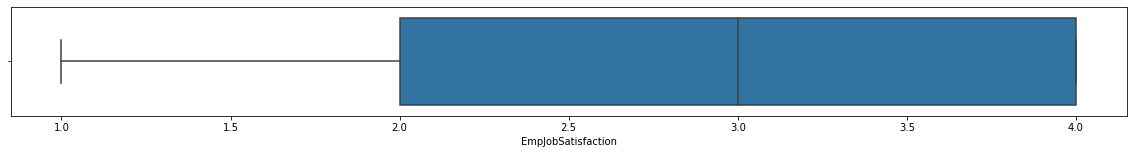

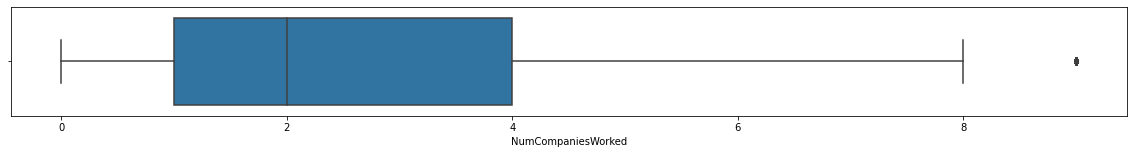

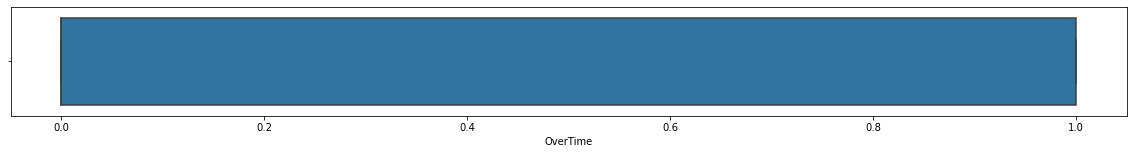

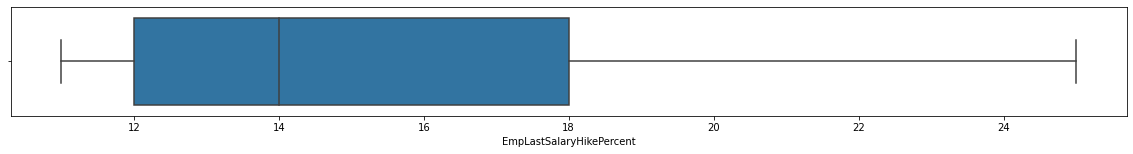

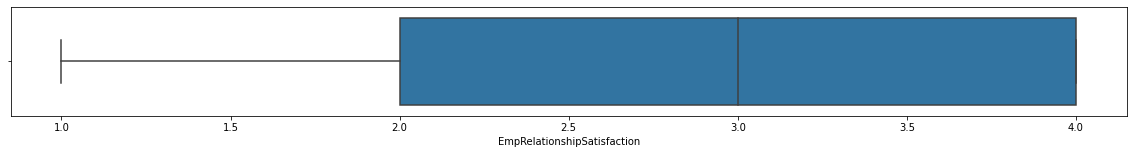

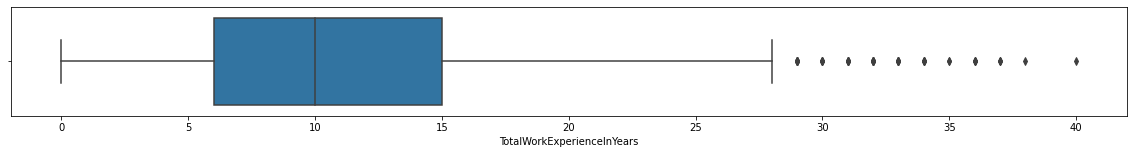

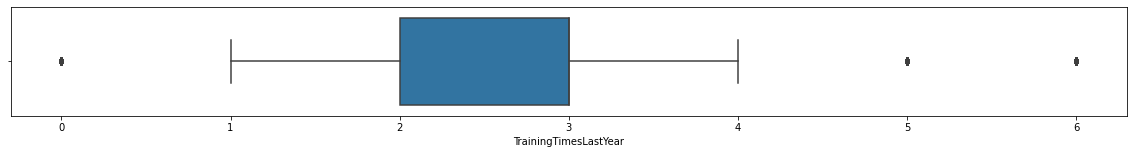

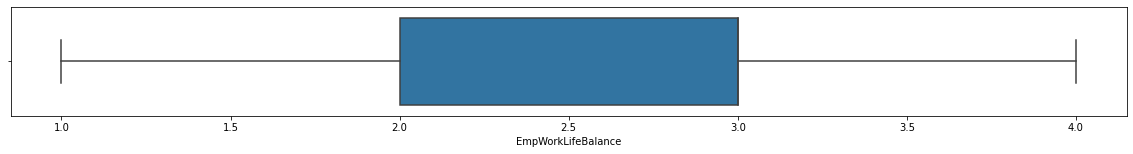

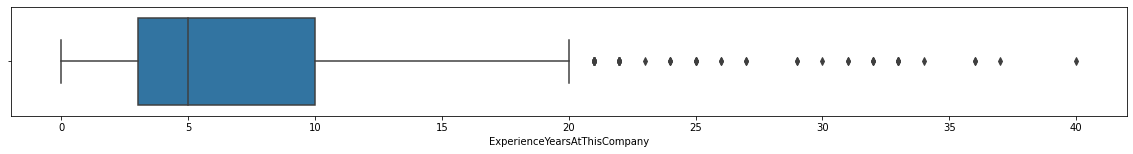

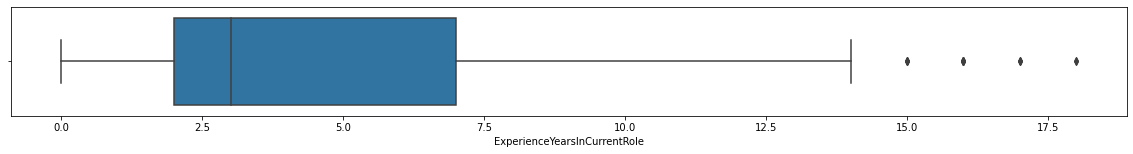

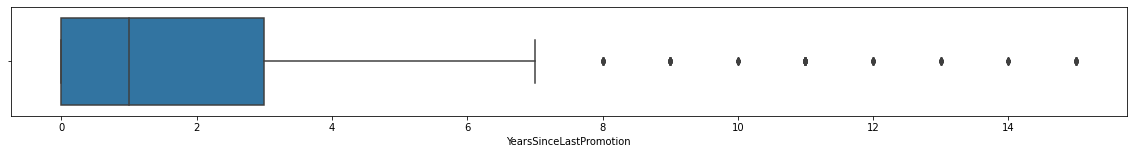

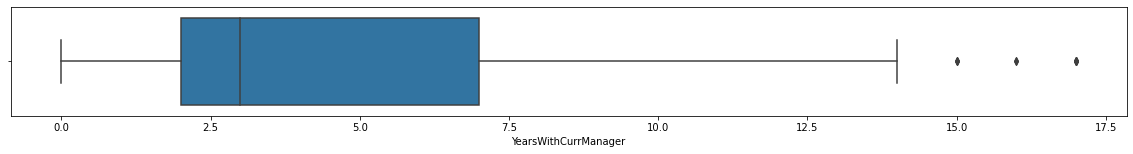

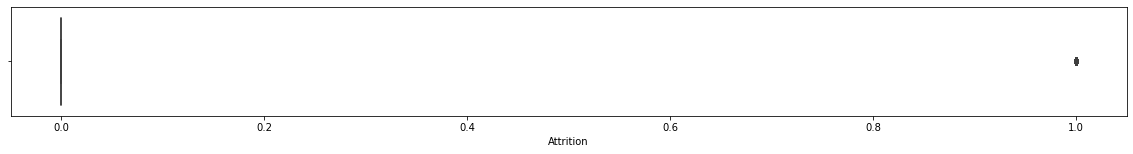

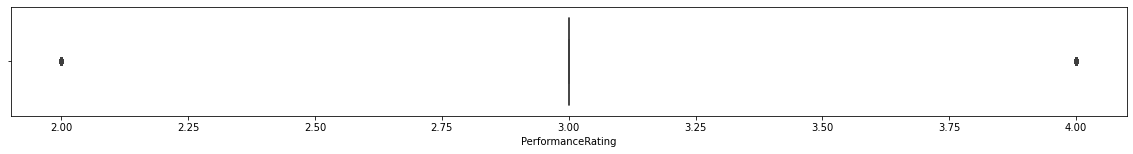

In [11]:
rcParams['figure.figsize'] = 20,2
for i in df:
    sns.boxplot(df[i]) #boxplot
    plt.show()

- Considering all the outliers as geniune

# Checking correlation of variables

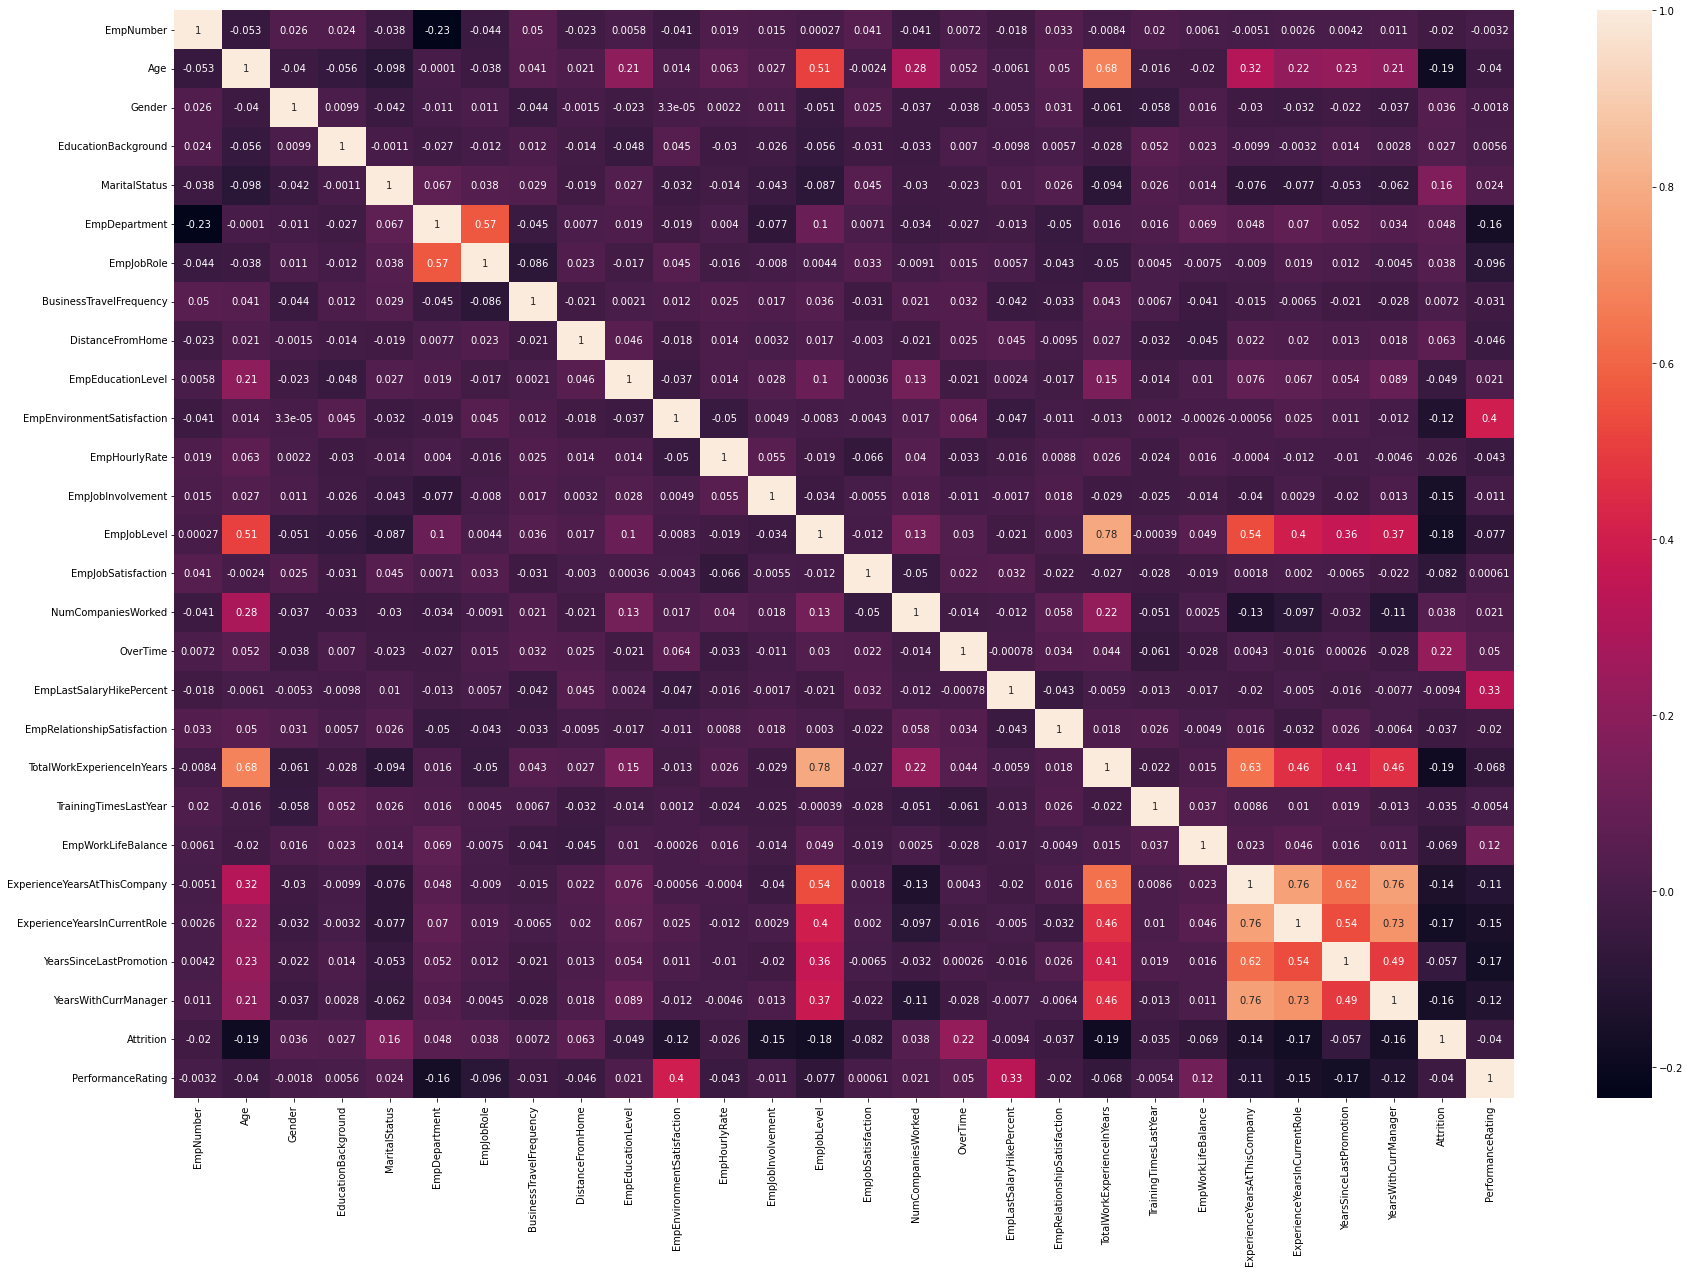

In [12]:
rcParams['figure.figsize'] = 30,20
sns.heatmap(df.corr(),annot=True) 
plt.show()

- Since there is no 100 percent strong correlation between any variables I'm keping them as they are

In [13]:
#df.to_csv('processed.csv',index=False) #saving processed data to csv file

# END